In [1]:
import pandas as pd

data = pd.read_csv('healthcare-dataset-stroke-data copy.csv')

# Display the first few rows
data.head()


,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [3]:
# Check for missing values
data.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [5]:
# Drop all rows with any missing values
data = data.dropna()

In [7]:
# Drop duplicate rows
data = data.drop_duplicates()

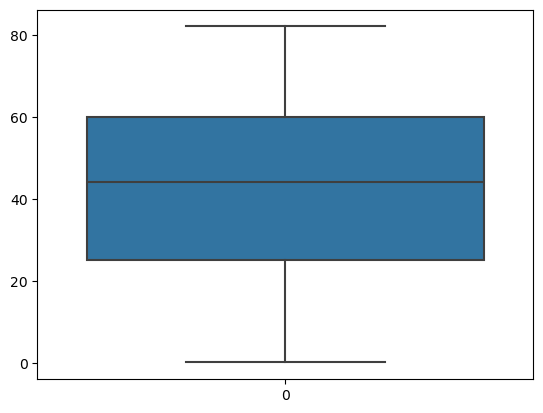

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Example: Check for outliers in the 'age' column
sns.boxplot(data['age'])
plt.show()

In [11]:
# Convert categorical columns to numerical using one-hot encoding
data = pd.get_dummies(data, columns=['gender', 'smoking_status'], drop_first=True)

In [13]:
# Keep only rows where age is 2 or older
data = data.loc[data['age'] >= 20]

In [15]:
data.head()

,id,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,Yes,Private,Urban,228.69,36.6,1,True,False,True,False,False
2,31112,80.0,0,1,Yes,Private,Rural,105.92,32.5,1,True,False,False,True,False
3,60182,49.0,0,0,Yes,Private,Urban,171.23,34.4,1,False,False,False,False,True
4,1665,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,1,False,False,False,True,False
5,56669,81.0,0,0,Yes,Private,Urban,186.21,29.0,1,True,False,True,False,False


In [17]:
# Drop irrelevant columns
data = data.drop(['id'], axis=1)

In [19]:
from sklearn.preprocessing import StandardScaler

# Standardize numerical columns
scaler = StandardScaler()
data[['age', 'bmi']] = scaler.fit_transform(data[['age', 'bmi']])

In [21]:
data.head()

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.941885,0,1,Yes,Private,Urban,228.69,0.837999,1,True,False,True,False,False
2,1.695747,0,1,Yes,Private,Rural,105.92,0.270923,1,True,False,False,True,False
3,-0.101924,0,0,Yes,Private,Urban,171.23,0.533714,1,False,False,False,False,True
4,1.637758,1,0,Yes,Self-employed,Rural,174.12,-0.904723,1,False,False,False,True,False
5,1.753736,0,0,Yes,Private,Urban,186.21,-0.213167,1,True,False,True,False,False


In [23]:
# Convert all boolean columns to 0s and 1s
data = data.replace({True: 1, False: 0})

In [25]:
data.head()

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.941885,0,1,Yes,Private,Urban,228.69,0.837999,1,1,0,1,0,0
2,1.695747,0,1,Yes,Private,Rural,105.92,0.270923,1,1,0,0,1,0
3,-0.101924,0,0,Yes,Private,Urban,171.23,0.533714,1,0,0,0,0,1
4,1.637758,1,0,Yes,Self-employed,Rural,174.12,-0.904723,1,0,0,0,1,0
5,1.753736,0,0,Yes,Private,Urban,186.21,-0.213167,1,1,0,1,0,0


In [27]:
# Replace 'Yes' and 'No' values with 1 and 0
data = data.replace({'Yes': 1, 'No': 0})

In [29]:
data.head()

,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0.941885,0,1,1,Private,Urban,228.69,0.837999,1,1,0,1,0,0
2,1.695747,0,1,1,Private,Rural,105.92,0.270923,1,1,0,0,1,0
3,-0.101924,0,0,1,Private,Urban,171.23,0.533714,1,0,0,0,0,1
4,1.637758,1,0,1,Self-employed,Rural,174.12,-0.904723,1,0,0,0,1,0
5,1.753736,0,0,1,Private,Urban,186.21,-0.213167,1,1,0,1,0,0


In [31]:
data = pd.get_dummies(data, drop_first=True)

In [33]:
data.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Never_worked,work_type_Private,work_type_Self-employed,Residence_type_Urban
0,0.941885,0,1,1,228.69,0.837999,1,1,0,1,0,0,False,True,False,True
2,1.695747,0,1,1,105.92,0.270923,1,1,0,0,1,0,False,True,False,False
3,-0.101924,0,0,1,171.23,0.533714,1,0,0,0,0,1,False,True,False,True
4,1.637758,1,0,1,174.12,-0.904723,1,0,0,0,1,0,False,False,True,False
5,1.753736,0,0,1,186.21,-0.213167,1,1,0,1,0,0,False,True,False,True


In [35]:
# Convert all boolean columns to 0s and 1s
data = data.replace({True: 1, False: 0})

In [37]:
data.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Never_worked,work_type_Private,work_type_Self-employed,Residence_type_Urban
0,0.941885,0,1,1,228.69,0.837999,1,1,0,1,0,0,0,1,0,1
2,1.695747,0,1,1,105.92,0.270923,1,1,0,0,1,0,0,1,0,0
3,-0.101924,0,0,1,171.23,0.533714,1,0,0,0,0,1,0,1,0,1
4,1.637758,1,0,1,174.12,-0.904723,1,0,0,0,1,0,0,0,1,0
5,1.753736,0,0,1,186.21,-0.213167,1,1,0,1,0,0,0,1,0,1


In [39]:
data[['avg_glucose_level']] = scaler.fit_transform(data[['avg_glucose_level']])

In [41]:
data.head()

,age,hypertension,heart_disease,ever_married,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,work_type_Never_worked,work_type_Private,work_type_Self-employed,Residence_type_Urban
0,0.941885,0,1,1,2.549640,0.837999,1,1,0,1,0,0,0,1,0,1
2,1.695747,0,1,1,-0.042753,0.270923,1,1,0,0,1,0,0,1,0,0
3,-0.101924,0,0,1,1.336323,0.533714,1,0,0,0,0,1,0,1,0,1
4,1.637758,1,0,1,1.397348,-0.904723,1,0,0,0,1,0,0,0,1,0
5,1.753736,0,0,1,1.652639,-0.213167,1,1,0,1,0,0,0,1,0,1


In [47]:
from sklearn.model_selection import train_test_split

# Split data into 80% training and 20% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
# Assuming 'stroke' is your target column, and the rest are features
X = data.drop('stroke', axis=1)  # Features
y = data['stroke']               # Target

In [49]:
from sklearn.linear_model import LogisticRegression

# Initialize and train the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [51]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision:", precision_score(y_test, y_pred))
print("Recall:", recall_score(y_test, y_pred))
print("F1 Score:", f1_score(y_test, y_pred))

Accuracy: 0.9369482976040353
Precision: 0.0
Recall: 0.0
F1 Score: 0.0


/opt/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [59]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
import numpy as np

# defining parameters for decision tree classifier 
parameters = {"max_depth": [3, 4, 5, 6], "max_features": [1, 2, 3, 4, 5, 6, 7, 8], "min_samples_leaf": [ 1, 2, 3, 4, 5, 6, 7, 8], "criterion": ["gini", "entropy"], "random_state": [40, 50, 60, 70, 80]}

# using a decision tree classifier, apply grid search
model = DecisionTreeClassifier()        
grid = GridSearchCV(model, parameters)    
grid.fit(X_train, y_train)

# predict values for test set
y_pred = grid.predict(X_test)

# counter for correct classification 
correct = 0

# remove index so we can iterate through Y_test
y_test_noIndex = y_test.reset_index(drop = True)

for i in range(np.size(y_pred)):
    #if correctly predicted
    if y_test_noIndex[i] == y_pred[i] :            
        #increase correct count
        correct += 1  

# calculate accuracy             
accuracy = (correct/np.size(y_pred)) * 100

print("Tuned Decision Tree Parameters: {}".format(grid.best_params_))
print("Maximum accuracy achieved by sklearn model through grid searching:", np.round(accuracy, 2))

Tuned Decision Tree Parameters: {'criterion': 'entropy', 'max_depth': 4, 'max_features': 6, 'min_samples_leaf': 1, 'random_state': 70}
Maximum accuracy achieved by sklearn model through grid searching: 93.69
